# Detection Malicious URL Using ML Models

# **Context**
Malicious URLs or malicious website is a very serious threat to cybersecurity. Malicious URLs host unsolicited content (spam, phishing, drive-by downloads, etc.) and lure unsuspecting users to become victims of scams (monetary loss, theft of private information, and malware installation), and cause losses of billions of dollars every year. We have collected this dataset to include a large number of examples of Malicious URLs so that a machine learning-based model can be developed to identify malicious urls so that we can stop them in advance before infecting computer system or spreading through inteinternet.

# **Content**
we have collected a huge dataset of 651,191 URLs, out of which 428103 benign or safe URLs, 96457 defacement URLs, 94111 phishing URLs, and 32520 malware URLs. Figure 2 depicts their distribution in terms of percentage. As we know one of the most crucial tasks is to curate the dataset for a machine learning project. We have curated this dataset from five different sources.

For collecting benign, phishing, malware and defacement URLs we have used [URL dataset (ISCX-URL-2016)](https://www.unb.ca/cic/datasets/url-2016.html) For increasing phishing and malware URLs, we have used [Malware domain black list dataset](http://www.malwaredomains.com/wordpress/?page_id=66). We have increased benign URLs using [faizan git repo](https://github.com/faizann24/Using-machine-learning-to-detect-malicious-URLs/tree/master/data) At last, we have increased more number of phishing URLs using [Phishtank dataset](https://www.phishtank.com/developer_info.php) and [PhishStorm dataset](https://research.aalto.fi/en/datasets/phishstorm--phishing--legitimate-url-dataset(f49465b2-c68a-4182-9171-075f0ed797d5).html) As we have told you that dataset is collected from different sources. So firstly, we have collected the URLs from different sources into a separate data frame and finally merge them to retain only URLs and their class type.

A URL consists of the top-level domain, hostname, paths, and port of the web
address, as in the following diagram:

![url](https://user-images.githubusercontent.com/70811337/150021474-4ba64b34-1d09-427f-9cf6-25508571d18d.PNG)

<h2 style="width: 100%;
    margin: 0;
    padding: 0;
    text-align: center;">---- Table of contents ----</h2>

1. [Importing Libraries](#1)
2. [Load Dataset](#2)
3. [Meta information of Dataframe](#3)
4. [Checking for NaN values](#4)
5. [Feature Extraction](#5)
6. [Train & Test Split](#6)
7. [Training models](#7)
  <ul>
      <li>✔️ Decision Tree Classifier</li>
      <li>✔️ Random Forest Classifier</li>
      <li>✔️ AdaBoost Classifier</li>
      <li>✔️ KNeighbors Classifier</li>
      <li>✔️ SGD Classifier</li>
      <li>✔️ Extra Trees Classifier</li>
      <li>✔️ Gaussian NB</li>
  </ul>
8. [Final Report](#8)

In [1]:
# extract the domain name from a URL (Extract the top level domain (TLD) from the URL given).

!pip install tld

     |████████████████████████████████| 274 kB 5.8 MB/s            


<a id="1"></a> <br>
# 📥 Importing Libraries

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from colorama import Fore  #Colorama is a module to color the python outputs

from urllib.parse import urlparse
# This module defines a standard interface to break Uniform Resource Locator (URL) 
# strings up in components (addressing scheme, network location, path etc.), 
# to combine the components back into a URL string, 
# and to convert a “relative URL” to an absolute URL given a “base URL.”

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

<a id="2"></a> <br>
# 🗃️ Load Dataset

In [3]:
data = pd.read_csv('../input/malicious-urls-dataset/malicious_phish.csv')
data.head(20)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://www.pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


Website **defacements** are the unauthorized modification of web pages, including the addition, removal, or alteration of existing content. These attacks are commonly carried out by hacktivists, who compromise a website or web server and replace or alter the hosted website information with their own messages.

**Phishing** is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message

**Malware** (short for “malicious software”) is a file or code, typically delivered over a network, that infects, explores, steals or conducts virtually any behavior an attacker wants. And because malware comes in so many variants, there are numerous methods to infect computer systems.

<a id="3"></a> <br>
# 📝 Meta information of Dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


<a id="4"></a>
# 🔎 Checking for NaN values

In [5]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [6]:
count = data.type.value_counts()
count

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

In [7]:
x=count.index
x

Index(['benign', 'defacement', 'phishing', 'malware'], dtype='object')

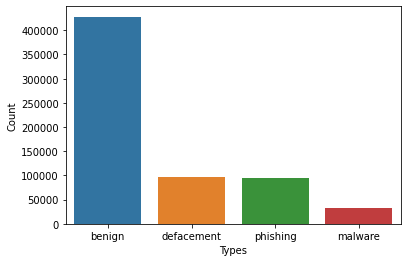

In [8]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

<h4>first have to omit the (www.) from the URL which is in fact a sub domain in itself.</h4>

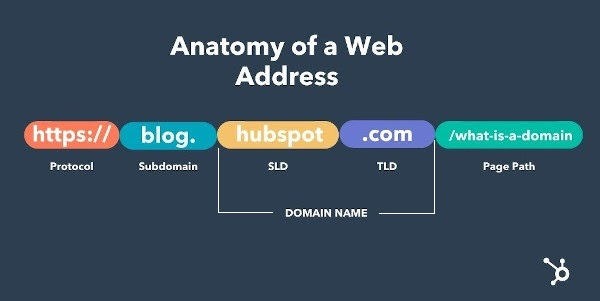

In [9]:
data['url'] = data['url'].replace('www.', '', regex=True)
data


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [10]:
data.head(10)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign
8,http://pashminaonline.com/pure-pashminas,defacement
9,allmusic.com/album/crazy-from-the-heat-r16990,benign


In [11]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)
data.head(20)

,url,type,Category
0,br-icloud.com.br,phishing,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0
8,http://pashminaonline.com/pure-pashminas,defacement,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0


<a id="5"></a> <br>
# 🦾 Feature Extraction

In [12]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [13]:
data.head()

,url,type,Category,url_len
0,br-icloud.com.br,phishing,2,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235


In [14]:
def process_tld(url):
    try:
#         Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain



# netloc : Contains the network location - which includes the domain itself (and subdomain if present), 
# the port number, along with an optional credentials in form of username:password . Together it may take
# form of username:password@domain.com:80

In [15]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [16]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [17]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [18]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [19]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
    
    

    

# urlparse():This function parses a URL into six components, returning a 6-tuple. 
# This corresponds to the general structure of a URL. Each tuple item is a string. 
# The components are not broken up in smaller parts 
#(for example, the network location is a single string), and % escapes are not expanded.

In [20]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

In [21]:
data.head(10)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0


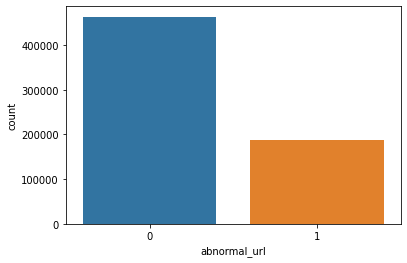

In [22]:
sns.countplot(x='abnormal_url', data=data);

In [23]:
def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [24]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

In [25]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,0,0,0,0,0,0,0,1,1,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0


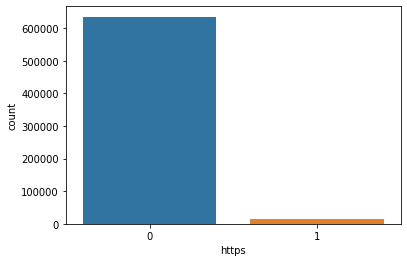

In [26]:
sns.countplot(x='https', data=data);

<h4>Counts the number of digit characters in a URL</h4>

In [27]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [28]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

<h4>Counts the number of letter characters in a URL</h4>

In [29]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,%,+,$,!,*,",",//,abnormal_url,https,digits
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,0,0,1,1,0,7
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,0,0,1,1,0,22


In [30]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# The isalpha() method returns True if all the characters are alphabet letters (a-z). 
# Example of characters that are not alphabet letters: (space)!

In [31]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

<h4>Checks to see whether URL contains a shortening service</h4>

In [32]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    

# A URL shortening service is a third-party website that converts that long URL to a short, 
# case-sensitive alphanumeric code. Simply put, this means that a URL shortening service takes 
# ridiculously long URLs (web addresses) and makes them short.

In [33]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

In [34]:
data.head(20)

,url,type,Category,url_len,domain,@,?,-,=,.,...,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,0,1,29,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,0,1,25,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,0,1,1,0,7,60,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,0,1,1,0,22,199,0
5,http://buzzfil.net/m/show-art/ils-etaient-loin...,benign,0,118,buzzfil.net,0,0,16,0,2,...,0,0,0,0,1,1,0,1,93,0
6,espn.go.com/nba/player/_/id/3457/brandon-rush,benign,0,45,espn.go.com,0,0,1,0,2,...,0,0,0,0,0,0,0,4,31,0
7,yourbittorrent.com/?q=anthony-hamilton-soulife,benign,0,46,yourbittorrent.com,0,1,2,1,1,...,0,0,0,0,0,0,0,0,40,1
8,http://pashminaonline.com/pure-pashminas,defacement,1,40,pashminaonline.com,0,0,1,0,1,...,0,0,0,0,1,1,0,0,34,0
9,allmusic.com/album/crazy-from-the-heat-r16990,benign,0,45,allmusic.com,0,0,4,0,1,...,0,0,0,0,0,0,0,5,33,0


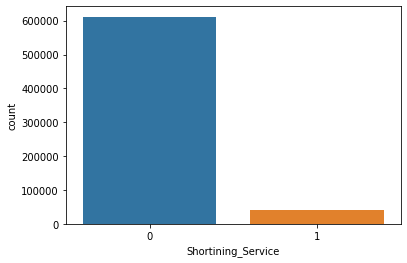

In [35]:
sns.countplot(x='Shortining_Service', data=data);

In [36]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [37]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [38]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,...,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,...,0,0,0,0,0,0,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,...,0,0,0,0,0,0,1,25,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,...,0,0,0,1,1,0,7,60,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,...,0,0,0,1,1,0,22,199,0,0


In [39]:
data['having_ip_address'].value_counts()

0    638703
1     12488
Name: having_ip_address, dtype: int64

<AxesSubplot:>

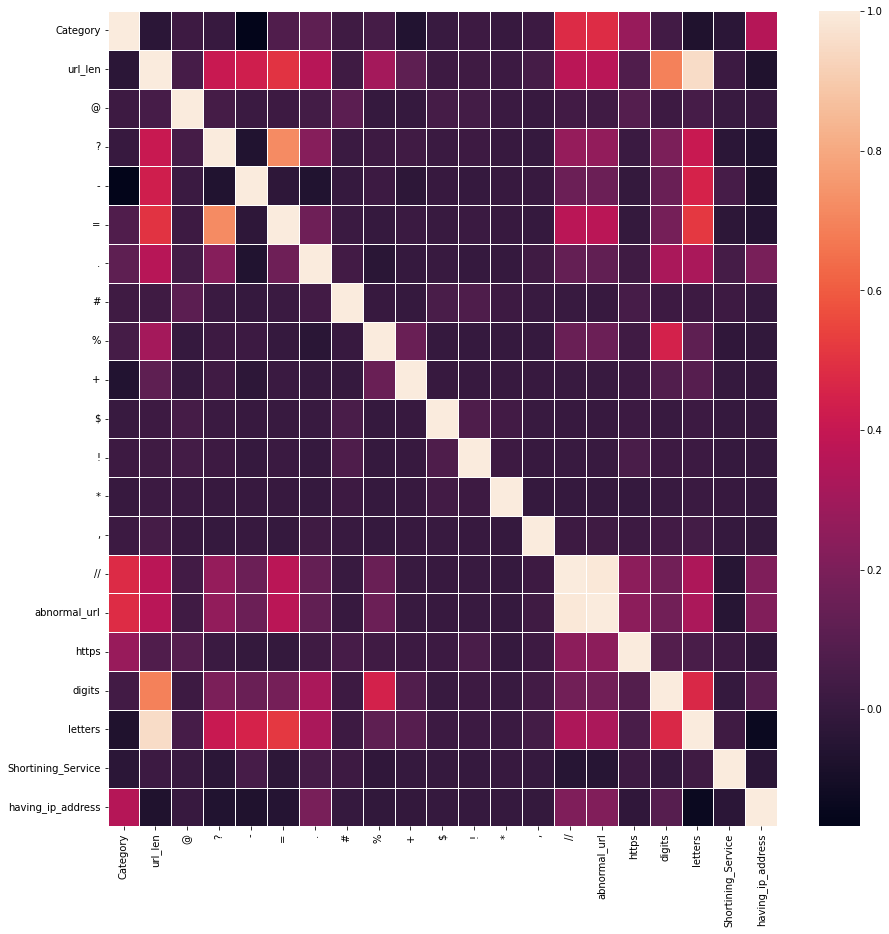

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

In [41]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [42]:
X

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,13,0,0
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,29,0,0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,25,0,0
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7,60,0,0
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,199,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,39,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,12,21,0,0
651187,44,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,7,29,1,0
651188,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,30,1,0
651189,45,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,36,0,0


In [43]:
y

0         2
1         0
2         0
3         1
4         1
         ..
651186    2
651187    2
651188    2
651189    2
651190    2
Name: Category, Length: 651191, dtype: int64

<a id="6"></a> <br>
# ✂️ Train & Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [45]:
X_train

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
510482,31,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,26,0,0
194358,86,0,0,7,0,1,0,0,0,0,0,0,0,1,1,0,6,65,0,0
611258,90,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,6,73,0,0
417382,39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34,0,0
225565,80,0,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,69,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84434,41,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,9,29,0,0
437782,21,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,18,0,0
620104,44,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8,27,0,0
203245,56,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,48,0,0


In [46]:
X_test

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
238731,96,0,1,1,5,2,0,0,0,0,0,0,0,1,1,0,2,76,0,0
309364,84,0,1,1,3,2,0,0,0,0,0,0,0,0,0,0,13,59,0,0
170638,83,0,0,13,0,2,0,0,0,0,0,0,0,1,1,0,31,30,0,0
246063,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,0,0
466287,39,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,5,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348509,78,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,4,58,0,0
500295,28,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,25,0,0
53597,82,0,1,0,4,2,0,0,0,0,0,0,0,1,1,0,4,63,0,0
26012,26,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,22,0,0


In [47]:
y_train

510482    0
194358    0
611258    2
417382    0
225565    0
         ..
84434     0
437782    0
620104    2
203245    0
100879    3
Name: Category, Length: 520952, dtype: int64

In [48]:
y_test

238731    1
309364    0
170638    1
246063    0
466287    0
         ..
348509    1
500295    0
53597     1
26012     0
212458    0
Name: Category, Length: 130239, dtype: int64

<a id="7"></a> <br>
# <img src="https://cdn-icons-png.flaticon.com/32/4149/4149680.png"/> Training models

In [49]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

#############################################
######-Model => AdaBoostClassifier 
Test Accuracy :  82.01%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     85565
           1       0.82      0.89      0.85     19319
           2       0.45      0.15      0.22     18805
           3       0.91      0.46      0.61      6550

    accuracy                           0.82    130239
   macro avg       0.75      0.62      0.65    130239
weighted avg       0.78      0.82      0.78    130239

             Confusion_matrix 


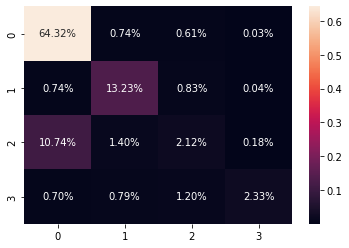

###################- End -###################
#############################################
######-Model => KNeighborsClassifier 
Test Accuracy :  88.96%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85565
           1       0.89      0.95      0.92     19319
           2       0.73      0.53      0.62     18805
           3       0.94      0.87      0.91      6550

    accuracy                           0.89    130239
   macro avg       0.87      0.83      0.84    130239
weighted avg       0.88      0.89      0.88    130239

             Confusion_matrix 


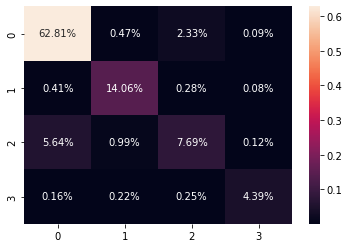

###################- End -###################
#############################################
######-Model => SGDClassifier 
Test Accuracy :  81.35%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     85565
           1       0.81      0.84      0.83     19319
           2       0.81      0.01      0.02     18805
           3       0.82      0.67      0.74      6550

    accuracy                           0.81    130239
   macro avg       0.81      0.63      0.62    130239
weighted avg       0.81      0.81      0.75    130239

             Confusion_matrix 


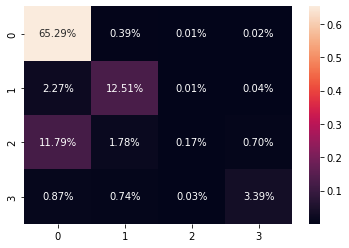

###################- End -###################
#############################################
######-Model => GaussianNB 
Test Accuracy :  78.95%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     85565
           1       0.66      1.00      0.79     19319
           2       0.60      0.02      0.04     18805
           3       0.61      0.70      0.65      6550

    accuracy                           0.79    130239
   macro avg       0.68      0.66      0.59    130239
weighted avg       0.77      0.79      0.74    130239

             Confusion_matrix 


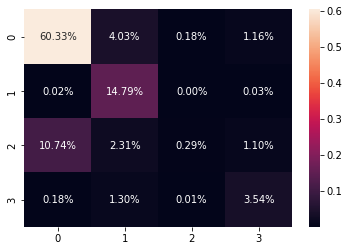

###################- End -###################
#############################################
######-Model => MLPClassifier 
Test Accuracy :  89.99%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85565
           1       0.89      0.96      0.92     19319
           2       0.82      0.51      0.63     18805
           3       0.89      0.82      0.85      6550

    accuracy                           0.90    130239
   macro avg       0.88      0.82      0.84    130239
weighted avg       0.90      0.90      0.89    130239

             Confusion_matrix 


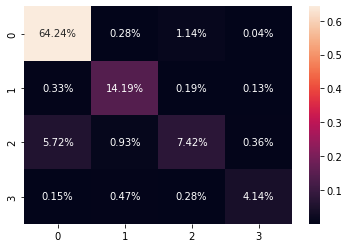

###################- End -###################
#############################################
######-Model => RidgeClassifier 
Test Accuracy :  80.00%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     85565
           1       0.67      0.98      0.80     19319
           2       0.45      0.06      0.10     18805
           3       0.81      0.39      0.52      6550

    accuracy                           0.80    130239
   macro avg       0.69      0.60      0.58    130239
weighted avg       0.76      0.80      0.75    130239

             Confusion_matrix 


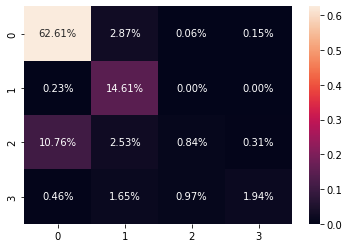

###################- End -###################
#############################################
######-Model => XGBClassifier 


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy :  88.99%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.88      0.99      0.94     85565
           1       0.89      0.96      0.93     19319
           2       0.89      0.36      0.52     18805
           3       0.95      0.85      0.90      6550

    accuracy                           0.89    130239
   macro avg       0.91      0.79      0.82    130239
weighted avg       0.89      0.89      0.87    130239

             Confusion_matrix 


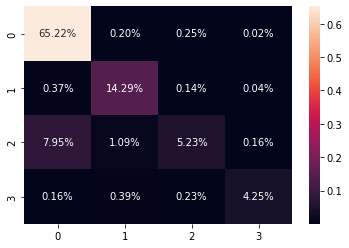

###################- End -###################


In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Updated model list
models = [
    AdaBoostClassifier,
    KNeighborsClassifier,
    SGDClassifier,
    GaussianNB,
    MLPClassifier,
    RidgeClassifier,
    XGBClassifier
]

accuracy_test = []

for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m.__name__))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


In [51]:
output = pd.DataFrame({
    "Model": [
        'AdaBoost Classifier',
        'KNeighbors Classifier',
        'SGD Classifier',
        'Gaussian NB',
        'MLP Classifier',
        'Ridge Classifier',
        'XGBoost Classifier'
    ],
    "Accuracy": accuracy_test
})


In [52]:
X_test

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
238731,96,0,1,1,5,2,0,0,0,0,0,0,0,1,1,0,2,76,0,0
309364,84,0,1,1,3,2,0,0,0,0,0,0,0,0,0,0,13,59,0,0
170638,83,0,0,13,0,2,0,0,0,0,0,0,0,1,1,0,31,30,0,0
246063,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,12,0,0
466287,39,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,5,27,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348509,78,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,4,58,0,0
500295,28,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,25,0,0
53597,82,0,1,0,4,2,0,0,0,0,0,0,0,1,1,0,4,63,0,0
26012,26,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,22,0,0


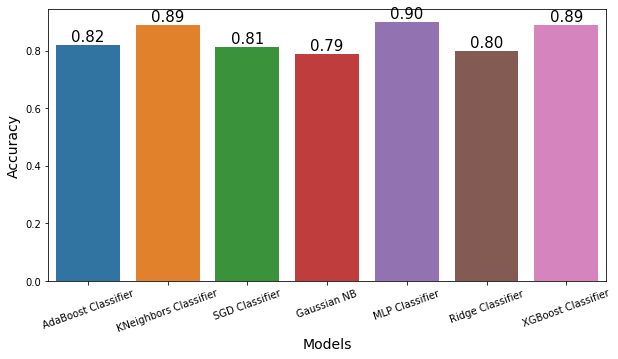

In [53]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [54]:
def URL_Converter(urls):
    data= pd.DataFrame()
    data['url'] = pd.Series(urls)

    
    data['url_len'] = data['url'].apply(lambda x: len(str(x)))
    data['domain'] = data['url'].apply(lambda i: process_tld(i))
    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for a in feature:
        data[a] = data['url'].apply(lambda i: i.count(a))  
    data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))
    data['https'] = data['url'].apply(lambda i: httpSecure(i))
    data['digits']= data['url'].apply(lambda i: digit_count(i))
    data['letters']= data['url'].apply(lambda i: letter_count(i))
    data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))
    data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))
    print(data.columns)
    X = data.drop(['url','domain'],axis=1)
    
    return X
    

In [55]:
urls= ['diaryofagameaddict.com',
'espdesign.com.au',
'iamagameaddict.com',
'kalantzis.net',
'slightlyoffcenter.net',
'toddscarwash.com',
'tubemoviez.com',
'ipl.hk',
'crackspider.us/toolbar/install.php?pack=exe',
'pos-kupang.com/',
'rupor.info',
'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
'officeon.ch.ma/office.js?google_ad_format=728x90_as',
'sn-gzzx.com',
'sunlux.net/company/about.html',
'outporn.com',
'timothycopus.aimoo.com',
'xindalawyer.com',
'freeserials.spb.ru/key/68703.htm',
'deletespyware-adware.com',
'orbowlada.strefa.pl/text396.htm',
'ruiyangcn.com',
'zkic.com',
'adserving.favorit-network.com/eas?camp=19320;cre=mu&grpid=1738&tag_id=618&nums=FGApbjFAAA',
'cracks.vg/d1.php',
'juicypussyclips.com',
'nuptialimages.com',
'andysgame.com',
'bezproudoff.cz',
'ceskarepublika.net',
'hotspot.cz',
'gmcjjh.org/DHL',
'nerez-schodiste-zabradli.com',
'nordiccountry.cz',
'nowina.info',
'obada-konstruktiwa.org',
'otylkaaotesanek.cz',
'pb-webdesign.net',
'pension-helene.cz',
'podzemi.myotis.info',
'smrcek.com',
'spekband.com',
'm2132.ehgaugysd.net/zyso.cgi?18',
'webcom-software.ws/links/?153646e8b0a88',
'worldgymperu.com',
'zgsysz.com',
'oknarai.ru',
'realinnovation.com/css/menu.js']

In [56]:
test_data= URL_Converter(urls)

Index(['url', 'url_len', 'domain', '@', '?', '-', '=', '.', '#', '%', '+', '$',
       '!', '*', ',', '//', 'abnormal_url', 'https', 'digits', 'letters',
       'Shortining_Service', 'having_ip_address'],
      dtype='object')


In [57]:
models

[sklearn.ensemble._weight_boosting.AdaBoostClassifier,
 sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.linear_model._stochastic_gradient.SGDClassifier,
 sklearn.naive_bayes.GaussianNB,
 sklearn.neural_network._multilayer_perceptron.MLPClassifier,
 sklearn.linear_model._ridge.RidgeClassifier,
 xgboost.sklearn.XGBClassifier]

In [58]:
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(test_data)
    print(pred)

#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
[2 2 2 2 2 2 2 2 0 0 2 0 0 0 0 2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 0 0 2 2 2 2]
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
#############################################
######-Model => <class 'sklearn.neural_network._multilayer_perceptron.M

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[2 0 2 2 0 2 2 2 0 0 2 0 0 2 0 2 2 2 0 0 0 2 2 0 0 2 2 2 2 2 2 0 0 2 2 2 2
 2 2 2 2 2 0 0 2 2 2 0]


**8 - Final Rreport**

In [59]:
output = pd.DataFrame({
    "Model": [
        'AdaBoost Classifier',
        'KNeighbors Classifier',
        'SGD Classifier',
        'Gaussian NB',
        'MLP Classifier',
        'Ridge Classifier',
        'XGBoost Classifier'
    ],
    "Accuracy": accuracy_test
})

print(output)


                   Model  Accuracy
0    AdaBoost Classifier  0.820077
1  KNeighbors Classifier  0.889618
2         SGD Classifier  0.813543
3            Gaussian NB  0.789548
4         MLP Classifier  0.899915
5       Ridge Classifier  0.799998
6     XGBoost Classifier  0.889887


In [60]:
import joblib
import os

# Create directory to save models
os.makedirs("saved_models", exist_ok=True)

# Save each trained model
for i, m in enumerate(models):
    model_name = m.__name__
    model_instance = m()
    model_instance.fit(X_train, y_train)
    joblib.dump(model_instance, f"saved_models/{model_name}.pkl")
    print(f"✅ Saved: saved_models/{model_name}.pkl")


✅ Saved: saved_models/AdaBoostClassifier.pkl
✅ Saved: saved_models/KNeighborsClassifier.pkl
✅ Saved: saved_models/SGDClassifier.pkl
✅ Saved: saved_models/GaussianNB.pkl
✅ Saved: saved_models/MLPClassifier.pkl
✅ Saved: saved_models/RidgeClassifier.pkl


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
✅ Saved: saved_models/XGBClassifier.pkl


In [61]:
import shutil

# Folder you want to zip
folder_to_zip = '/kaggle/working/saved_models'
zip_filename = '/kaggle/working/saved_models.zip'

# Create ZIP file
shutil.make_archive(base_name=zip_filename.replace('.zip', ''), format='zip', root_dir=folder_to_zip)

print(f"✅ Folder '{folder_to_zip}' zipped as '{zip_filename}'")


✅ Folder '/kaggle/working/saved_models' zipped as '/kaggle/working/saved_models.zip'


In [62]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

#############################################
######-Model =>  Random Forest Classifier 
Test Accuracy :  91.47% 
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.94      0.96      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.96      0.91      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

Confusion Matrix:


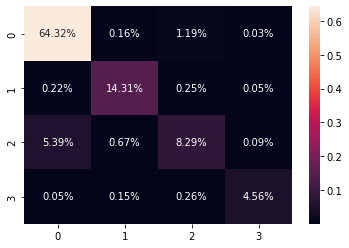

###################- End -###################
#############################################
######-Model =>  Gradient Boosting Classifier 
Test Accuracy :  85.90% 
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     85565
           1       0.84      0.95      0.89     19319
           2       0.82      0.21      0.33     18805
           3       0.90      0.75      0.82      6550

    accuracy                           0.86    130239
   macro avg       0.86      0.73      0.74    130239
weighted avg       0.85      0.86      0.83    130239

Confusion Matrix:


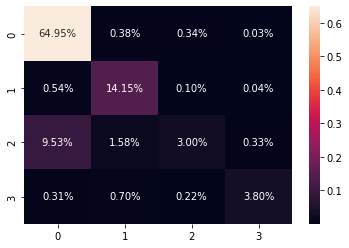

###################- End -###################
#############################################
######-Model =>  Extra Trees Classifier 
Test Accuracy :  91.48% 
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.93      0.97      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.97      0.91      0.94      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

Confusion Matrix:


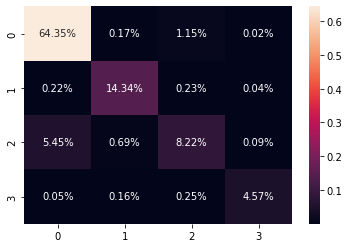

###################- End -###################
#############################################
######-Model =>  Logistic Regression 
Test Accuracy :  82.54% 
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     85565
           1       0.77      0.95      0.85     19319
           2       0.59      0.05      0.10     18805
           3       0.86      0.68      0.76      6550

    accuracy                           0.83    130239
   macro avg       0.77      0.67      0.65    130239
weighted avg       0.79      0.83      0.77    130239

Confusion Matrix:


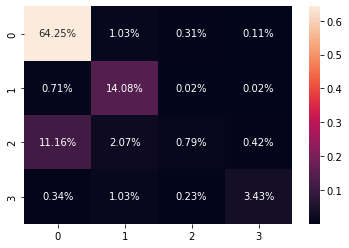

###################- End -###################
#############################################
######-Model =>  LGBM Classifier 


[LightGBM] [Fatal] Feature (_) appears more than one time.


Error with model LGBM Classifier: Feature (_) appears more than one time.
###################- End -###################
#############################################
######-Model =>  CatBoost Classifier 
Error with model CatBoost Classifier: catboost/libs/data/features_layout.cpp:109: All feature names should be different, but '_' used more than once.
###################- End -###################

############### Training Deep Learning Model ###############
Epoch 1/5
1/1 [==============================] - 14s 14s/step - loss: 0.6973 - accuracy: 0.5000 - val_loss: 0.7072 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 0.6824 - accuracy: 0.5556 - val_loss: 0.7030 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 0.6937 - accuracy: 0.5556 - val_loss: 0.7001 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 0.6837 - accuracy: 0.7778 - val_loss: 0.69

ValueError: Found input variables with inconsistent numbers of samples: [130239, 20]

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === Clean column names to remove special characters ===
X_train.columns = [re.sub(r'[^\w\s]', '_', str(col)) for col in X_train.columns]
X_test.columns = [re.sub(r'[^\w\s]', '_', str(col)) for col in X_test.columns]

# === DL setup for raw URL sequences ===
MAX_LEN = 100
VOCAB_SIZE = 1000

tokenizer = Tokenizer(char_level=True, lower=True, num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)  # separate raw URL text
X_seq_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN)
X_seq_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN)

# === DL Model ===
def build_dl_model():
    model = Sequential([
        Embedding(VOCAB_SIZE, 32, input_length=MAX_LEN),
        Conv1D(64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === ML Model Evaluation ===
accuracy_test = []
model_names = []

ml_models = [
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Extra Trees Classifier', ExtraTreesClassifier()),
    ('Logistic Regression', LogisticRegression(solver='liblinear')),
    ('LGBM Classifier', LGBMClassifier()),
    ('CatBoost Classifier', CatBoostClassifier(verbose=0))
]

for name, model in ml_models:
    print('#############################################')
    print(f'######-Model => \033[07m {name} \033[0m')
    try:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        accuracy_test.append(acc)
        model_names.append(name)
        print(f'Test Accuracy :\033[32m \033[01m {acc * 100:.2f}% \033[0m')
        print('\033[01mClassification Report:\033[0m')
        print(classification_report(y_test, pred))
        print('\033[01mConfusion Matrix:\033[0m')
        cf_matrix = confusion_matrix(y_test, pred)
        sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
        plt.show()
    except Exception as e:
        print(f"Error with model {name}: {e}")
    print('\033[31m###################- End -###################\033[0m')

# === DL Model Training ===
print('\n\033[34m############### Training Deep Learning Model ###############\033[0m')
dl_model = build_dl_model()
dl_model.fit(X_seq_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

dl_pred_probs = dl_model.predict(X_seq_test)
dl_preds = (dl_pred_probs > 0.5).astype(int).flatten()

acc_dl = accuracy_score(y_test, dl_preds)
print('\033[32mDL Test Accuracy: {:.2f}%\033[0m'.format(acc_dl * 100))
print(classification_report(y_test, dl_preds))
sns.heatmap(confusion_matrix(y_test, dl_preds) / np.sum(confusion_matrix(y_test, dl_preds)), annot=True, fmt='0.2%')
plt.show()

# Add DL model to output
model_names.append("Deep Learning Model (CNN)")
accuracy_test.append(acc_dl)

# === Hybrid Model (Stack ML + DL) ===
print('\n\033[36m############### Hybrid Model (Stacked) ###############\033[0m')

base_learners = [
    ('lgbm', LGBMClassifier()),
    ('rf', RandomForestClassifier())
]
meta_model = LogisticRegression()

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)

combined_preds = ((stack_pred + dl_preds) > 1).astype(int)

acc_combined = accuracy_score(y_test, combined_preds)
print('\033[35mHybrid Accuracy (DL + ML): {:.2f}%\033[0m'.format(acc_combined * 100))
print(classification_report(y_test, combined_preds))
sns.heatmap(confusion_matrix(y_test, combined_preds) / np.sum(confusion_matrix(y_test, combined_preds)), annot=True, fmt='0.2%')
plt.show()

# Add Hybrid model to output
model_names.append("Hybrid Model (Stacked + DL)")
accuracy_test.append(acc_combined)

# === Final Output Table ===
output = pd.DataFrame({"Model": model_names, "Accuracy": accuracy_test})
print("\n\033[01mFinal Accuracy Summary:\033[0m")
print(output.sort_values(by="Accuracy", ascending=False))


In [ ]:
# === Imports ===
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === Deep Learning Tokenization ===
MAX_LEN = 100
VOCAB_SIZE = 1000

tokenizer = Tokenizer(char_level=True, lower=True, num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)  # X_raw_train: list of raw URL strings

X_seq_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN)
X_seq_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN)

# === Deep Learning Model ===
def build_dl_model():
    model = Sequential([
        Embedding(VOCAB_SIZE, 32, input_length=MAX_LEN),
        Conv1D(64, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === ML Model List ===
models = [
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    LogisticRegression,
    LGBMClassifier,
    CatBoostClassifier
]

# === Train and Evaluate ML Models ===
accuracy_test = []

for m in models:
    print('#############################################')
    print(f'######-Model =>\033[07m {m.__name__} \033[0m')
    try:
        model_ = m()
        model_.fit(X_train, y_train)
        pred = model_.predict(X_test)
        acc = accuracy_score(y_test, pred)
        accuracy_test.append(acc)
        print(f'Test Accuracy :\033[32m \033[01m {acc*100:.2f}% \033[0m')
        print('\033[01mClassification Report:\033[0m')
        print(classification_report(y_test, pred))
        print('\033[01mConfusion Matrix:\033[0m')
        cf_matrix = confusion_matrix(y_test, pred)
        sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
        plt.show()
    except Exception as e:
        print(f"Error with model {m.__name__}: {e}")
    print('\033[31m###################- End -###################\033[0m')

# === Train and Evaluate DL Model ===
print('\n\033[34m############### Training Deep Learning Model ###############\033[0m')
dl_model = build_dl_model()
dl_model.fit(X_seq_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

dl_pred_probs = dl_model.predict(X_seq_test)
dl_preds = (dl_pred_probs > 0.5).astype(int).flatten()

acc_dl = accuracy_score(y_test, dl_preds)
print('\033[32mDL Test Accuracy: {:.2f}%\033[0m'.format(acc_dl * 100))
print(classification_report(y_test, dl_preds))
sns.heatmap(confusion_matrix(y_test, dl_preds) / np.sum(confusion_matrix(y_test, dl_preds)), annot=True, fmt='0.2%')
plt.show()

# === Hybrid Stacked Model ===
print('\n\033[36m############### Hybrid Model (Stacked ML + DL) ###############\033[0m')

# Base ML models
base_learners = [
    ('lgbm', LGBMClassifier()),
    ('rf', RandomForestClassifier())
]
meta_model = LogisticRegression()

stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)
stack_model.fit(X_train, y_train)
stack_pred = stack_model.predict(X_test)

# Combine DL + Stacking
combined_preds = ((stack_pred + dl_preds) > 1).astype(int)

acc_combined = accuracy_score(y_test, combined_preds)
print('\033[35mHybrid Accuracy (DL + ML): {:.2f}%\033[0m'.format(acc_combined * 100))
print(classification_report(y_test, combined_preds))
sns.heatmap(confusion_matrix(y_test, combined_preds) / np.sum(confusion_matrix(y_test, combined_preds)), annot=True, fmt='0.2%')
plt.show()


Test

In [ ]:
!pip install lightgbm catboost xgboost tensorflow keras

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier

# Re-import DL tools if needed
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale X for DL models
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Convert to tensors
X_dl = np.array(X_scaled)
y_dl = to_categorical(y)

In [ ]:
# Splits again for DL usage
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=2)


In [ ]:
# Machine Learning models
ml_models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'CatBoost': CatBoostClassifier(verbose=0)
}


In [ ]:
accuracy_test = []

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

for name, model in ml_models.items():
    print('#############################################')
    print(f'######-Model =>\033[07m {name} \033[0m')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


In [ ]:
# Feed Forward Neural Network (MLP)
def build_mlp(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

print("Training MLP Neural Network...")
mlp_model = build_mlp(X_train_dl.shape[1], y_dl.shape[1])
mlp_model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, verbose=1, validation_data=(X_test_dl, y_test_dl))
loss, acc = mlp_model.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"MLP Accuracy: \033[32m{acc*100:.2f}%\033[0m")


In [ ]:
# CNN model
X_cnn = X_dl.reshape(X_dl.shape[0], X_dl.shape[1], 1)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_dl, test_size=0.2, random_state=2)

def build_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

print("Training CNN model...")
cnn_model = build_cnn((X_cnn.shape[1], 1), y_dl.shape[1])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_cnn), verbose=1)
loss, acc = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"CNN Accuracy: \033[32m{acc*100:.2f}%\033[0m")

In [ ]:
# ------------------------ HYBRID (DL Features + ML Classifier) ------------------------ #
# Example: Use last hidden layer of MLP as input to XGBoost
from keras.models import Model

extract_model = Model(inputs=mlp_model.input, outputs=mlp_model.layers[-2].output)
X_train_feats = extract_model.predict(X_train_dl)
X_test_feats = extract_model.predict(X_test_dl)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
y_train_mapped = np.argmax(y_train_dl, axis=1)
y_test_mapped = np.argmax(y_test_dl, axis=1)
xgb.fit(X_train_feats, y_train_mapped)
pred = xgb.predict(X_test_feats)

acc = accuracy_score(y_test_mapped, pred)
print(f"Hybrid DL+ML (MLP + XGBoost) Accuracy: \033[35m{acc*100:.2f}%\033[0m")

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Use the correct DataFrame and column
text_column = 'url'  # character-tokenize the 'url' column

# Character-level tokenization
char_tokenizer = Tokenizer(char_level=True)
char_tokenizer.fit_on_texts(data[text_column].astype(str))

# Convert to sequences and pad
sequences = char_tokenizer.texts_to_sequences(data[text_column].astype(str))
MAX_LEN = 300  # You can adjust based on URL length distribution
X_char = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

# Target variable
y_char = to_categorical(data['Category'])  # assuming 'Category' is the label

# Train-test split
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split(
    X_char, y_char, test_size=0.2, random_state=2
)

# Vocabulary size
vocab_size = len(char_tokenizer.word_index) + 1

In [ ]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=MAX_LEN))
lstm_model.add(LSTM(128, return_sequences=False))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(y_char.shape[1], activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Training LSTM model...")
lstm_model.fit(X_train_char, y_train_char, epochs=10, batch_size=32, validation_data=(X_test_char, y_test_char), verbose=1)

# Evaluate
loss, acc = lstm_model.evaluate(X_test_char, y_test_char, verbose=0)
print(f"\033[36mLSTM Accuracy (Char-level): {acc*100:.2f}%\033[0m")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class labels from the model
y_pred_probs = lstm_model.predict(X_test_char)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_char, axis=1)

# Confusion Matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LSTM (Char-level)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: Classification report
print("\033[01mClassification Report:\033[0m")
print(classification_report(y_true, y_pred))


In [ ]:
# Save the trained model
lstm_model.save('cnn_lstm_model.h5')  # You can change the name as needed
print("Model saved to 'cnn_lstm_model.h5'")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class labels from the LSTM model
y_pred_probs = lstm_model.predict(X_test_char)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_char, axis=1)

# Confusion Matrix
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_true, y_pred)

# Normalize and plot the confusion matrix
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%', cmap='Blues')

# Show the plot
plt.show()

# Optional: Classification report
print("\033[01mClassification Report:\033[0m")
print(classification_report(y_true, y_pred))

# End of Confusion Matrix
print('\033[31m###################- End -###################\033[0m')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Store LSTM accuracy from earlier
lstm_accuracy = acc  # assuming `acc` is already defined from LSTM evaluation

# 2. Create DataFrame for LSTM only
output = pd.DataFrame({
    "Model": ['LSTM (Char-level)'],
    "Accuracy": [lstm_accuracy]
})

# 3. Plot accuracy
plt.figure(figsize=(6, 4))
plot = sns.barplot(x='Model', y='Accuracy', data=output, palette='Blues_d')
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', size=14, xytext=(0, 8),
                  textcoords='offset points')

plt.xlabel("Model", size=12)
plt.ylabel("Accuracy", size=12)
plt.title("LSTM Model Accuracy", size=14)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


In [ ]:
# Test URLs
urls = [
    'diaryofagameaddict.com',
'espdesign.com.au',
'iamagameaddict.com',
'kalantzis.net',
'slightlyoffcenter.net',
'toddscarwash.com',
'tubemoviez.com',
'ipl.hk',
'crackspider.us/toolbar/install.php?pack=exe',
'pos-kupang.com/',
'rupor.info',
'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt',
'officeon.ch.ma/office.js?google_ad_format=728x90_as',
'sn-gzzx.com',
'sunlux.net/company/about.html',
'outporn.com',
'timothycopus.aimoo.com',
'xindalawyer.com',
'freeserials.spb.ru/key/68703.htm',
'deletespyware-adware.com',
'orbowlada.strefa.pl/text396.htm',
'ruiyangcn.com',
'zkic.com',
'adserving.favorit-network.com/eas?camp=19320;cre=mu&grpid=1738&tag_id=618&nums=FGApbjFAAA',
'cracks.vg/d1.php',
'juicypussyclips.com',
'nuptialimages.com',
'andysgame.com',
'bezproudoff.cz',
'ceskarepublika.net',
'hotspot.cz',
'gmcjjh.org/DHL',
'nerez-schodiste-zabradli.com',
'nordiccountry.cz',
'nowina.info',
'obada-konstruktiwa.org',
'otylkaaotesanek.cz',
'pb-webdesign.net',
'pension-helene.cz',
'podzemi.myotis.info',
'smrcek.com',
'spekband.com',
'm2132.ehgaugysd.net/zyso.cgi?18',
'webcom-software.ws/links/?153646e8b0a88',
'worldgymperu.com',
'zgsysz.com',
'oknarai.ru',
'realinnovation.com/css/menu.js'
]

In [ ]:


# Convert URLs to character-level sequences
test_sequences = char_tokenizer.texts_to_sequences(urls)
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post')

# Predict using trained LSTM model
predictions = lstm_model.predict(test_padded)
predicted_classes = predictions.argmax(axis=1)

# Output predictions
for url, pred_class in zip(urls, predicted_classes):
    print(f"URL: {url} --> Predicted Class: {pred_class}")


In [ ]:
print('#############################################')
print('######-Model =>\033[07m LSTM (Char-level) \033[0m')

# Convert URLs into char-level sequences
test_sequences = char_tokenizer.texts_to_sequences(urls)
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post')

# Predict
pred_probs = lstm_model.predict(test_padded)
predicted_classes = pred_probs.argmax(axis=1)

# Output predictions
for url, pred_class in zip(urls, predicted_classes):
    print(f"URL: {url} --> Predicted Class: {pred_class}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define model
cnn_lstm_model = Sequential()
cnn_lstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=MAX_LEN))
cnn_lstm_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
cnn_lstm_model.add(MaxPooling1D(pool_size=2))
cnn_lstm_model.add(LSTM(64, return_sequences=False))
cnn_lstm_model.add(Dropout(0.3))
cnn_lstm_model.add(Dense(64, activation='relu'))
cnn_lstm_model.add(Dense(y_char.shape[1], activation='softmax'))

# Compile model
cnn_lstm_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train
print("Training CNN + LSTM model...")
cnn_lstm_model.fit(X_train_char, y_train_char, epochs=10, batch_size=32, validation_data=(X_test_char, y_test_char), verbose=1)

# Evaluate
loss, acc = cnn_lstm_model.evaluate(X_test_char, y_test_char, verbose=0)
print(f"\033[36mCNN + LSTM Accuracy (Char-level): {acc*100:.2f}%\033[0m")


In [ ]:
print('#############################################')
print('######-Model =>\033[07m CNN + LSTM (Char-level) \033[0m')

# Prepare input
test_sequences = char_tokenizer.texts_to_sequences(urls)
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post')

# Predict
pred_probs = cnn_lstm_model.predict(test_padded)
predicted_classes = pred_probs.argmax(axis=1)

# Output
for url, pred_class in zip(urls, predicted_classes):
    print(f"URL: {url} --> Predicted Class: {pred_class}")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class labels from the LSTM model
y_pred_probs = cnn_lstm_model.predict(X_test_char)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_char, axis=1)

# Confusion Matrix
print('\033[01m             Confusion_matrix \033[0m')
cf_matrix = confusion_matrix(y_true, y_pred)

# Normalize and plot the confusion matrix
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%', cmap='Blues')

# Show the plot
plt.show()

# Optional: Classification report
print("\033[01mClassification Report:\033[0m")
print(classification_report(y_true, y_pred))

# End of Confusion Matrix
print('\033[31m###################- End -###################\033[0m')


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D, Add

In [ ]:
# --- Positional Encoding ---
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, max_len, d_model):
        super().__init__()
        pos = np.arange(max_len)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
        angle_rads = pos * angle_rates

        # Apply sin to even indices; cos to odd
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

        self.pos_encoding = tf.cast(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        return x + self.pos_encoding[:, :tf.shape(x)[1], :]

# --- Transformer Block ---
def transformer_block(x, num_heads, ff_dim, dropout=0.1):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)

    ff_output = Dense(ff_dim, activation='relu')(out1)
    ff_output = Dense(x.shape[-1])(ff_output)
    ff_output = Dropout(dropout)(ff_output)
    return LayerNormalization(epsilon=1e-6)(out1 + ff_output)

# --- Build Model ---
def build_transformer_model(vocab_size, max_len, num_classes):
    inputs = Input(shape=(max_len,))
    x = Embedding(input_dim=vocab_size, output_dim=128)(inputs)
    x = PositionalEncoding(max_len, 128)(x)
    x = transformer_block(x, num_heads=2, ff_dim=64, dropout=0.1)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# --- Instantiate and Compile ---
transformer_model = build_transformer_model(vocab_size, MAX_LEN, y_char.shape[1])
transformer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Train ---
print("\033[34mTraining Transformer Model...\033[0m")
transformer_model.fit(X_train_char, y_train_char, 
                      epochs=20, batch_size=32, 
                      validation_data=(X_test_char, y_test_char),
                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                      verbose=1)



In [ ]:
# --- Evaluate ---
loss, acc = transformer_model.evaluate(X_test_char, y_test_char, verbose=0)
print(f"\033[36mTransformer Accuracy (Char-level): {acc*100:.2f}%\033[0m")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class probabilities on test set
y_pred_probs = transformer_model.predict(X_test_char)

# Convert one-hot predictions and labels to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_char, axis=1)

# Create confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Normalize confusion matrix by total values
cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum()

# Print label
print('\033[01m             Confusion Matrix \033[0m')

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix_normalized, annot=True, fmt='.2%', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Transformer Model - Confusion Matrix')
plt.show()

print('\033[31m###################- End -###################\033[0m')


In [ ]:
# Classification Report
print('\n\033[01mClassification Report:\033[0m')
print(classification_report(y_true, y_pred))

In [ ]:
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_char, y_test_char, verbose=0)
cnn_lstm_loss, cnn_lstm_acc = cnn_lstm_model.evaluate(X_test_char, y_test_char, verbose=0)
transformer_loss, transformer_acc = transformer_model.evaluate(X_test_char, y_test_char, verbose=0)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Automatically use the accuracy variables
model_names = ['LSTM', 'CNN + LSTM', 'Transformer']
accuracies = [lstm_acc * 100, cnn_lstm_acc * 100, transformer_acc * 100]  # convert to percentage

# DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plotting
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plot = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='mako')
plot.set_ylim(90, 100)

# Annotate bars
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f') + '%',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', size=12)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def plot_confusion_and_report(model, X_test, y_test, model_name="Model", class_names=None):
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Classification report
    print(f"\n\033[1mClassification Report - {model_name}:\033[0m")
    if class_names:
        print(classification_report(y_true, y_pred, target_names=class_names))
    else:
        print(classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Custom colormap
    colors = ["#F5F5F5", "#FFD700", "#FFA500", "#FF4500", "#8B0000"]
    cmap = mcolors.ListedColormap(colors)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap=cmap,
                xticklabels=class_names if class_names else None,
                yticklabels=class_names if class_names else None)
    plt.title(f'Normalized Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


In [ ]:
class_names = ['benign','phishing' , 'defacement', 'malware']

plot_confusion_and_report(lstm_model, X_test_char, y_test_char, model_name="LSTM", class_names=class_names)
plot_confusion_and_report(cnn_lstm_model, X_test_char, y_test_char, model_name="CNN + LSTM", class_names=class_names)
plot_confusion_and_report(transformer_model, X_test_char, y_test_char, model_name="Transformer", class_names=class_names)


<a id="9"></a> <br>
# ✨ Thanks

* Feel free to download Notebook and do experiments on it.
* Comments if you find something inappropriate and will improve accordingly.
* Upvote if you find this notebook useful.